Spectral Clustering 완료! 결과가 'Rdata_Spectral_filtered.csv'에 저장되었습니다.

클러스터별 주요 키워드:
Cluster 1: [('카페', np.float64(0.1273584198052012)), ('커피', np.float64(0.10392737732742995)), ('좋고', np.float64(0.0967084979656274)), ('맛있고', np.float64(0.09558083982542628)), ('분위기도', np.float64(0.08946865539903287)), ('맛있어요', np.float64(0.08273490185991433)), ('분위기', np.float64(0.08113394449225321)), ('커피도', np.float64(0.07999122399698191)), ('좋은', np.float64(0.07405385703199603)), ('디저트', np.float64(0.07385204809233052))]
Cluster 2: [('케이크', np.float64(0.219489556015268)), ('레터링', np.float64(0.07314147714688657)), ('케이크가', np.float64(0.07035965816711962)), ('케이크도', np.float64(0.06910420881858607)), ('케이크를', np.float64(0.0659412670026756)), ('사장님', np.float64(0.059977657504965025)), ('맛있어요', np.float64(0.0598102503183578)), ('케이크는', np.float64(0.056472967730892824)), ('급하게', np.float64(0.056415003596221494)), ('디자인도', np.float64(0.056246886401999985))]
Cluster 0: [('맛있어요', np.float64(0.11068476439570808

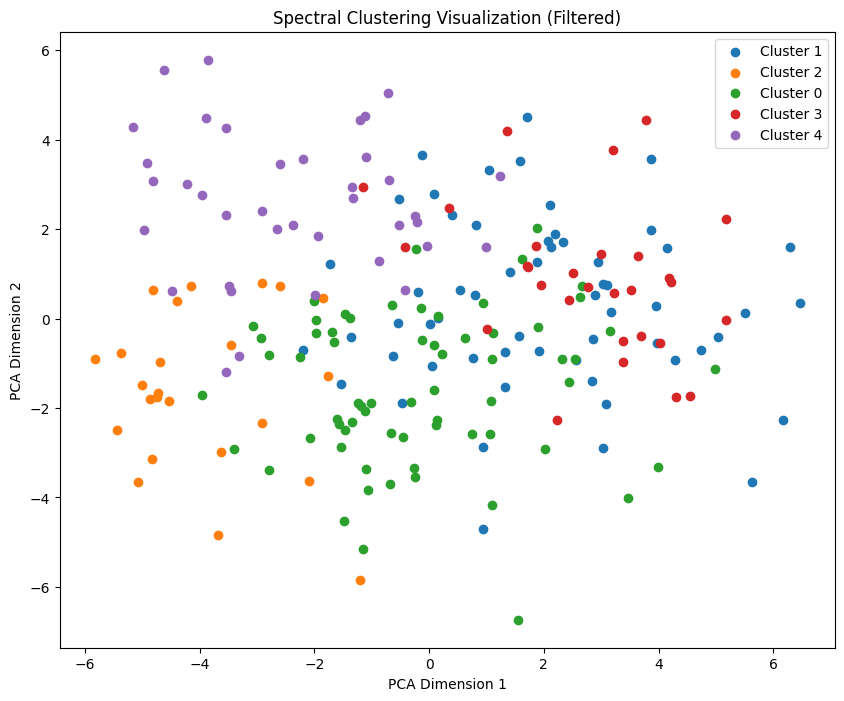

In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from tqdm import tqdm

# 데이터 로드
df = pd.read_csv("Rdata.csv")

stop_words = ['너무', '좋아요', '맛있어요', '정말', '진짜', '완전', 
              '넘', '쩔어', 'ㅎㅎ', 'ㅋㅋ', '다시', '또', '항상']

def remove_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['filtered_review'] = df['review'].apply(lambda x: remove_stop_words(str(x), stop_words))

model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

texts = df['filtered_review'].astype(str).tolist()
embeddings = [model.encode(text, show_progress_bar=False) for text in tqdm(texts, desc="임베딩 생성 중", disable=True)]

df['임베딩'] = [embedding.tolist() for embedding in embeddings]

similarity_matrix = cosine_similarity(embeddings)

n_clusters = 5
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
df['클러스터'] = spectral_clustering.fit_predict(similarity_matrix)

output_file = "Rdata_Spectral_filtered.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Spectral Clustering 완료! 결과가 '{output_file}'에 저장되었습니다.")

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

# 클러스터별 주요 키워드 추출
print("\n클러스터별 주요 키워드:")
for cluster in df['클러스터'].unique():
    cluster_indices = df[df['클러스터'] == cluster].index
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    top_indices = cluster_tfidf.A.flatten().argsort()[::-1][:10]
    top_keywords = [(feature_names[i], cluster_tfidf[0, i]) for i in top_indices]
    print(f"Cluster {cluster}: {top_keywords}")

# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
unique_clusters = df['클러스터'].unique()
for cluster in unique_clusters:
    cluster_points = reduced_embeddings[df['클러스터'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("Spectral Clustering Visualization (Filtered)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()

Spectral Clustering 완료! 결과가 'Rdata_Spectral_filtered.csv'에 저장되었습니다.

클러스터별 주요 키워드:

Cluster 0 (총 59개 리뷰):
  카페: 0.1465
  커피: 0.1089
  분위기: 0.0933
  디저트: 0.0827
  분위기가: 0.0820
  좋은: 0.0770
  디저트도: 0.0727
  건대: 0.0643
  인테리어가: 0.0575
  음료도: 0.0563
  커피가: 0.0552
  있는: 0.0537
  좋았어요: 0.0505
  사장님: 0.0477
  카페가: 0.0476

Cluster 1 (총 64개 리뷰):
  커피: 0.0786
  가성비: 0.0643
  친절해요: 0.0599
  커피가: 0.0594
  자주: 0.0487
  맛있게: 0.0467
  아이스크림: 0.0414
  맛있네요: 0.0397
  맛있어서: 0.0391
  베이글: 0.0383
  매장이: 0.0375
  역시: 0.0374
  빨리: 0.0354
  맛있는: 0.0345
  친절하시고: 0.0344

Cluster 2 (총 26개 리뷰):
  넓고: 0.1402
  커피: 0.1076
  매장이: 0.0767
  스타벅스: 0.0644
  넓어서: 0.0630
  카페: 0.0621
  커피가: 0.0605
  좋은: 0.0588
  매장: 0.0570
  대화하기: 0.0563
  분위기: 0.0563
  편하고: 0.0542
  조용하고: 0.0488
  있고: 0.0486
  친절해요: 0.0485

Cluster 3 (총 43개 리뷰):
  와플: 0.0554
  밀크티: 0.0534
  맛있었어요: 0.0507
  빵이: 0.0503
  커피: 0.0492
  에그타르트: 0.0486
  요거트: 0.0441
  맛있게: 0.0441
  맛이: 0.0424
  맛있는: 0.0406
  먹고: 0.0399
  그릭요거트: 0.0377
  엄청: 0.0375
  맛있어서: 0.03

C:\Users\santa\AppData\Local\Temp\ipykernel_7564\1435329318.py:118: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\santa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


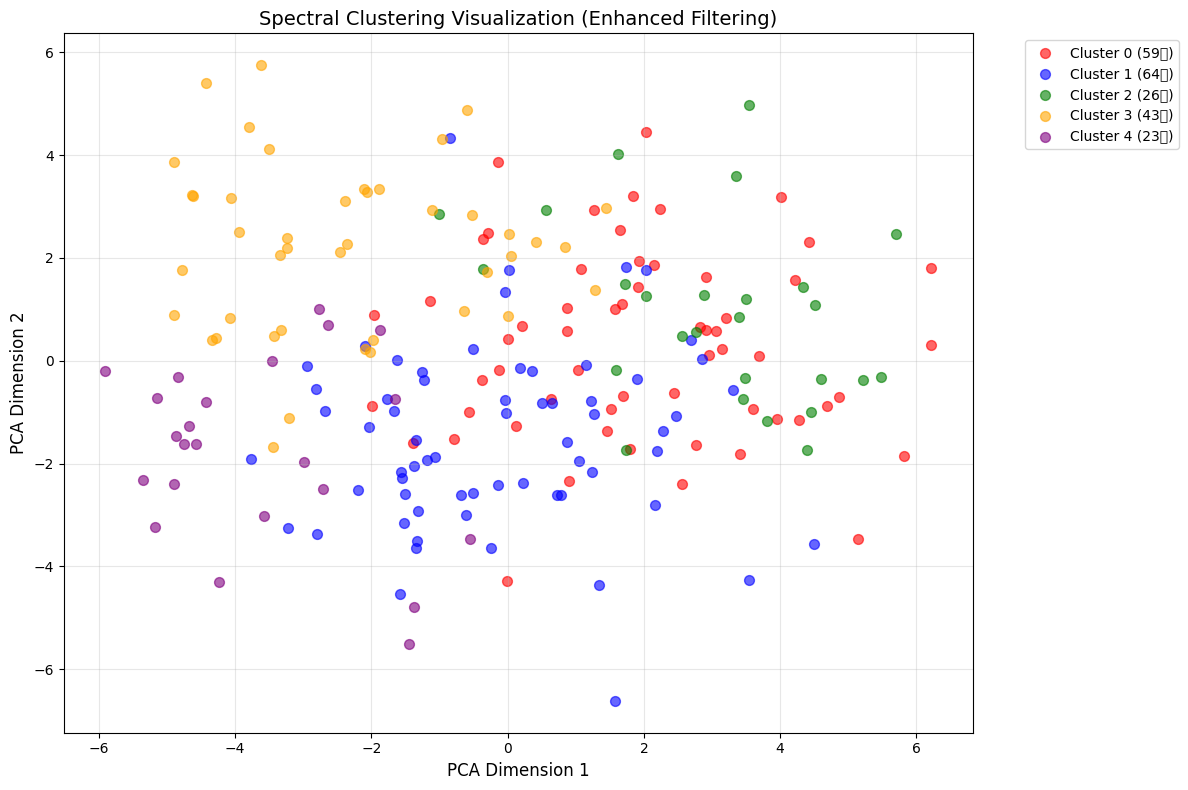


각 클러스터의 샘플 리뷰:

=== Cluster 0 샘플 리뷰 ===
1. 아메라카노 원두 세가지 중에 고를 수 있어서 취향에 맞게 먹을 수 있어 좋아요. 물론 맛도 좋구요! 바닐라빈라떼랑 휘낭시에랑 에그타르트도 다 맛있어서 허겁지겁 먹었네요ㅋㅋ +담요,...
2. 건대입구 올 때마다 들르는 카페입니다~
이번이 세 번째 아인슈페너인데, 항상 맛있네요
커피도 맛있고 분위기도 좋아서 지인들한테도 추천합니다ㅎ
로스팅도 직접해서 그런지 카페 들...
3. 망고 디저트를 좋은 가격에 다양한 종류로 즐길 수 있어 좋고 먹고 갈수있는 이트인석도 있어 좋았어요! 매장도 깔끔해요! 음료가 엄청 빨리 나오네요~

지나다 궁금해서 들러봤는데...

=== Cluster 1 샘플 리뷰 ===
1. 저의 최애커피집이에요 너무 맛있고 좋아요 점심에 항상 바쁜데도 늘 친절해요
음료 메뉴가 엄청 많은데 제가 먹어본거는 다 괜찮아요
지점이 많이 생기고 있는 것 같아서 좋네요 후문...
2. 모든 소품들이 twg 로고가 박혀있어 정말 고급스러워서 대접 받는 느낌에 더 맛나게 기분좋게 먹었습니다 타임리스 홍차도 넘~향기롭고 맛났어요.
리조또가 느끼할 쯤 한입 마시면 다...
3. 일요일 마감 15분 전에 너무 먹고 싶어서 전화 드렸는데 마감까지 주문 받아주신다 하셔서 바로 달려갔더니 너무너무 친절하게 응대해주셨어요 !!
결제할 때 통신사 할인도 여쭤봐주셔...

=== Cluster 2 샘플 리뷰 ===
1. 조아요 커피 맛있어요! 케이크도! 진짜 아지트같은 카페에여ㅠㅠ최애 좌석이 편하고 콘센트 꼽기 좋다. 책상이 넓어 공부할 것 있을 때마다 들고 가게 됨. 친구랑 수다떨러 가기도 좋음...
2. 지인들과 담소 나누러 카페를 찾다가 우연히 들어간 곳인데 좋았어요. 사장님도 친절하시고 분위기도 아늑하니 좋았습니다.
흑당 판나코타가 맛있으니 꼭 드셔보세요! 커피맛 좋구요!
...
3. 사장님 친절하시구 음료랑 디저트 맛있어요 ㅎㅎ
넓고 늦게까지 영업하는 곳이라 밤에 노트북 들고와서 작업하기 너

In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from tqdm import tqdm

# 데이터 로드
df = pd.read_csv("Rdata.csv")

# 강화된 불용어 목록
stop_words = [
    # 기본 불용어
    '너무', '좋아요', '맛있어요', '정말', '진짜', '완전', '넘', '쩔어',
    'ㅎㅎ', 'ㅋㅋ', '다시', '또', '항상',
    
    # 형용사 변형
    '좋고', '맛있고', '예쁘고', '깨끗하고', '친절하고', '아늑하고',
    
    # 동사 변형
    '있어서', '가서', '와서', '해서', '갔어요', '왔어요', '가요', '와요',
    
    # 조사/어미
    '커피도', '분위기도', '사장님도', '직원도', '카페도', '매장도',
    '에요', '어요', '이고', '하고', '에서', '으로', '로서',
    
    # 일반적 표현
    '오늘', '어제', '내일', '지금', '그때', '이번', '다음',
    '여기', '거기', '저기', '이곳', '그곳', '저곳',
    '이거', '그거', '저거', '것도', '거나', '같아요', '같고',
    
    # 카페 리뷰 특화 불용어
    '리뷰', '방문', '추천', '번창', '사진', '올게요', '갈게요'
]

def remove_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# 불용어 제거
df['filtered_review'] = df['review'].apply(lambda x: remove_stop_words(str(x), stop_words))

# 임베딩 모델 로드
model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

# 임베딩 생성
texts = df['filtered_review'].astype(str).tolist()
embeddings = [model.encode(text, show_progress_bar=False) for text in tqdm(texts, desc="임베딩 생성 중", disable=True)]

df['임베딩'] = [embedding.tolist() for embedding in embeddings]

# 코사인 유사도 행렬 계산
similarity_matrix = cosine_similarity(embeddings)

# Spectral Clustering
n_clusters = 5
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
df['클러스터'] = spectral_clustering.fit_predict(similarity_matrix)

# 결과 저장
output_file = "Rdata_Spectral_filtered.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Spectral Clustering 완료! 결과가 '{output_file}'에 저장되었습니다.")

# TF-IDF 벡터화 (강화된 불용어 처리)
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    max_df=0.8,  # 80% 이상 문서에 등장하는 단어 제거
    min_df=2,    # 2개 미만 문서에만 등장하는 단어 제거
    ngram_range=(1, 2)  # 1-gram과 2-gram 모두 사용
)
tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

# 클러스터별 주요 키워드 추출
print("\n클러스터별 주요 키워드:")
for cluster in sorted(df['클러스터'].unique()):
    cluster_indices = df[df['클러스터'] == cluster].index
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    top_indices = cluster_tfidf.A.flatten().argsort()[::-1][:15]  # 상위 15개로 증가
    top_keywords = [(feature_names[i], cluster_tfidf[0, i]) for i in top_indices]
    
    print(f"\nCluster {cluster} (총 {len(cluster_indices)}개 리뷰):")
    for keyword, score in top_keywords:
        print(f"  {keyword}: {score:.4f}")

# 클러스터별 리뷰 수 확인
print(f"\n클러스터별 리뷰 개수:")
for cluster in sorted(df['클러스터'].unique()):
    count = len(df[df['클러스터'] == cluster])
    print(f"Cluster {cluster}: {count}개")

# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 시각화
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple']
unique_clusters = sorted(df['클러스터'].unique())

for i, cluster in enumerate(unique_clusters):
    cluster_points = reduced_embeddings[df['클러스터'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               label=f"Cluster {cluster} ({len(cluster_points)}개)", 
               alpha=0.6, s=50, c=colors[i % len(colors)])

plt.title("Spectral Clustering Visualization (Enhanced Filtering)", fontsize=14)
plt.xlabel("PCA Dimension 1", fontsize=12)
plt.ylabel("PCA Dimension 2", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 각 클러스터의 샘플 리뷰 출력
print(f"\n각 클러스터의 샘플 리뷰:")
for cluster in sorted(df['클러스터'].unique()):
    cluster_reviews = df[df['클러스터'] == cluster]['review'].head(3)
    print(f"\n=== Cluster {cluster} 샘플 리뷰 ===")
    for i, review in enumerate(cluster_reviews.values, 1):
        print(f"{i}. {review[:100]}...")

----------------------

Spectral Clustering (k=8)

데이터 형태: (215, 2)
카페 수: 215
카페별 리뷰 수:
카페이름
FFEE                        1
MouseRabbit카페               1
TAKEN COFFEE 건대후문점카페,디저트    1
TWG Tea 성수낙낙점               1
걈카페,디저트                     1
                           ..
해피니스디저트카페,디저트               1
헤이티 건대점차                    1
환원당                         1
흐릇카페                        1
히브베이크샵 레터링케이크 주문제작케이크       1
Name: count, Length: 215, dtype: int64
임베딩 모델 로딩 중...
임베딩 생성 중...


임베딩 생성: 100%|██████████| 215/215 [00:27<00:00,  7.91it/s]


코사인 유사도 행렬 계산 중...
Spectral Clustering 수행 중...
클러스터링 결과가 'Rdata_Spectral_k8.csv'에 저장되었습니다.
TF-IDF 벡터화 중...

=== 클러스터링 결과 (k=8) ===
클러스터별 리뷰 개수:
Cluster 0: 40개 (18.6%)
Cluster 1: 47개 (21.9%)
Cluster 2: 23개 (10.7%)
Cluster 3: 15개 (7.0%)
Cluster 4: 21개 (9.8%)
Cluster 5: 16개 (7.4%)
Cluster 6: 28개 (13.0%)
Cluster 7: 25개 (11.6%)

=== 클러스터별 주요 키워드 ===

--- Cluster 0 (40개 리뷰) ---
  카페: 0.1599
  커피: 0.1229
  분위기: 0.1034
  넓고: 0.0926
  디저트: 0.0895
  좋은: 0.0798
  디저트도: 0.0796
  분위기가: 0.0739
  커피가: 0.0718
  음료도: 0.0658

--- Cluster 1 (47개 리뷰) ---
  빵이: 0.0762
  친절해요: 0.0650
  커피: 0.0562
  맛있게: 0.0549
  가성비: 0.0527
  아이스크림: 0.0512
  커피가: 0.0509
  맛있네요: 0.0465
  소금빵: 0.0406
  맛있어서: 0.0404

--- Cluster 2 (23개 리뷰) ---
  와플: 0.1038
  빙수: 0.0822
  요거트: 0.0811
  망고: 0.0701
  그릭요거트: 0.0625
  먹고: 0.0525
  맛이: 0.0504
  아이스크림: 0.0503
  맛있게: 0.0500
  맛있었어요: 0.0495

--- Cluster 3 (15개 리뷰) ---
  케이크: 0.3199
  케이크가: 0.1064
  레터링: 0.1013
  케이크도: 0.0999
  급하게: 0.0804
  디자인도: 0.0766
  케이크는: 0.0763
  예쁘게: 0.0732
  케

C:\Users\santa\AppData\Local\Temp\ipykernel_31180\3183777307.py:223: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


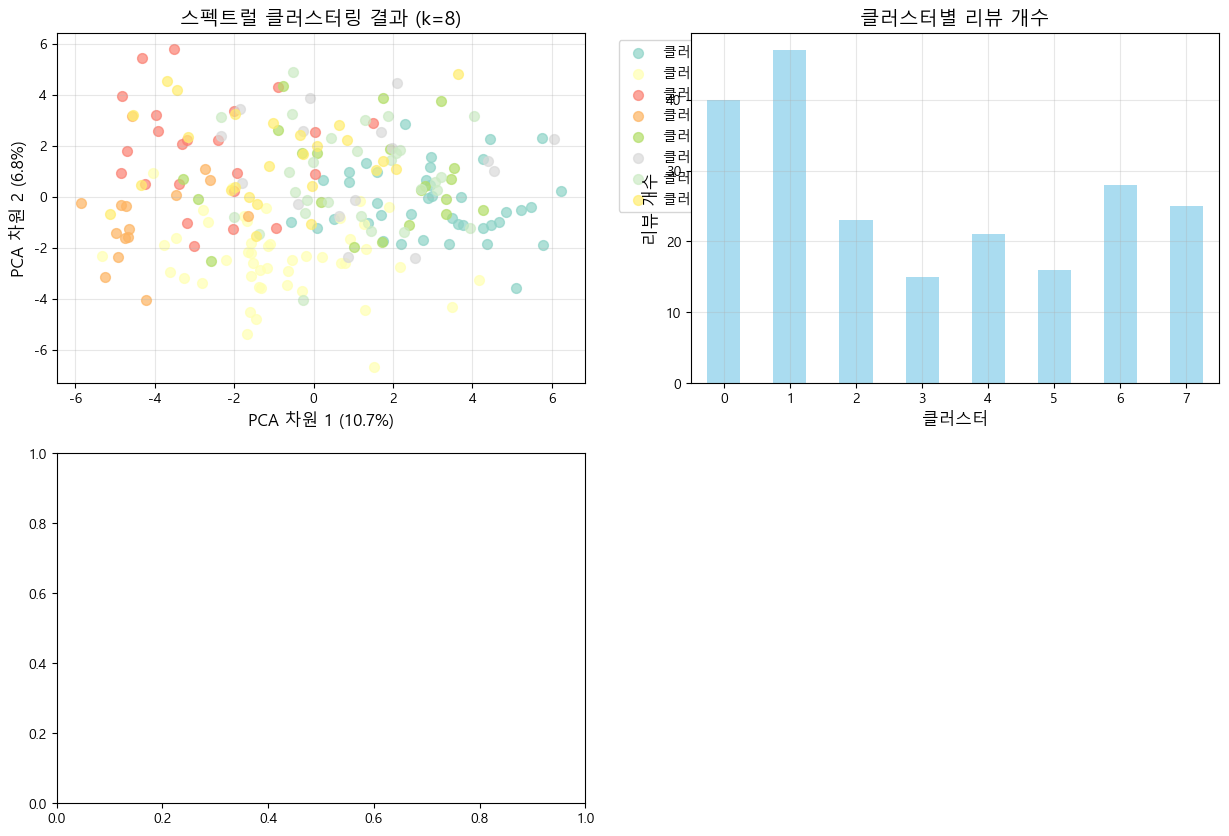

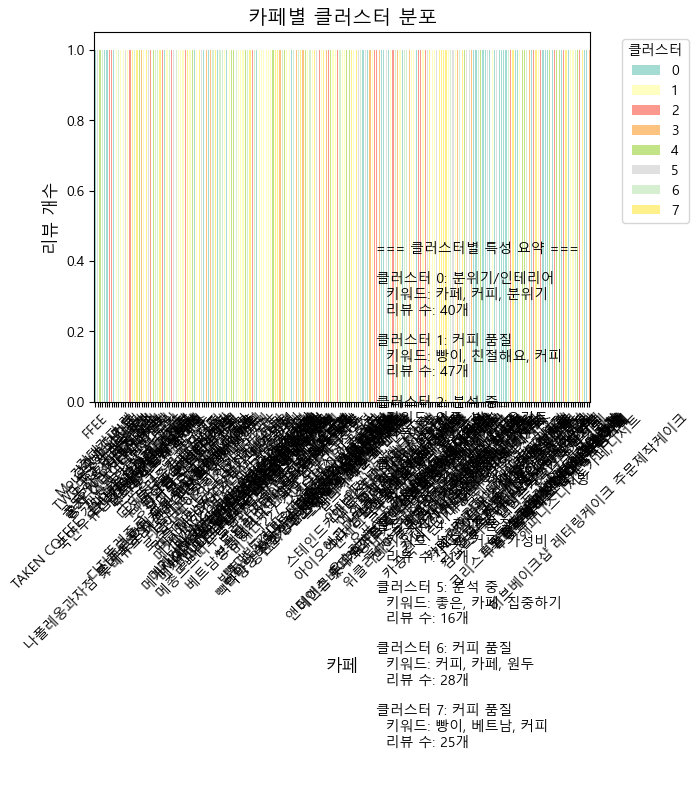


=== 클러스터별 샘플 리뷰 ===

--- 클러스터 0: 분위기/인테리어 ---
1. [FFEE] 아메라카노 원두 세가지 중에 고를 수 있어서 취향에 맞게 먹을 수 있어 좋아요. 물론 맛도 좋구요! 바닐라빈라떼랑 휘낭시에랑 에그타르트도 다 맛있어서 허겁지겁 먹었네요ㅋㅋ +담요,...
2. [걈카페,디저트] 조아요 커피 맛있어요! 케이크도! 진짜 아지트같은 카페에여ㅠㅠ최애 좌석이 편하고 콘센트 꼽기 좋다. 책상이 넓어 공부할 것 있을 때마다 들고 가게 됨. 친구랑 수다떨러 가기도 좋음...

--- 클러스터 1: 커피 품질 ---
1. [공차 건대로데오점] 일요일 마감 15분 전에 너무 먹고 싶어서 전화 드렸는데 마감까지 주문 받아주신다 하셔서 바로 달려갔더니 너무너무 친절하게 응대해주셨어요 !!
결제할 때 통신사 할인도 여쭤봐주셔...
2. [공차 어린이대공원역점] 만들어주시는 분 손이 짱 빨라요.
덕분에 시원하게 음료 먹을 수 있었습니다 ! 자주 방문하는 곳입니다.
이 날은 어린이대공원에 나들이 가기 전 공차 하나 들고 가라고 방문 했네...

--- 클러스터 2: 분석 중... ---
1. [고망고 건대점] 망고 디저트를 좋은 가격에 다양한 종류로 즐길 수 있어 좋고 먹고 갈수있는 이트인석도 있어 좋았어요! 매장도 깔끔해요! 음료가 엄청 빨리 나오네요~

지나다 궁금해서 들러봤는데...
2. [고망고 건대중문점] 프랜차이즈인줄도 모르고 부산여행 갔을 때 해운대 맛집이길래 가서 먹었던 기억이 ㅠㅠ 학교근처에 있었네요 ㅎㅎㅎ;; 더울때 상큼하게 먹기 좋고, 단 거 많이 먹으면 느끼해지는데 양이...

--- 클러스터 3: 디저트 맛집 ---
1. [나나케이크케이크전문] 남자친구와 4주년 기념으로 케이크 예약했는데 사장님도 정말 친절하시고 무엇보다 케이크가 예뻐서 먹기 아까울정도였어요! 특히 젤리가 투명하고 예쁜데 촛불켜니 반짝임과 영롱함이 두배 ...
2. [레스트인무드] 오늘도 도장깨기 성공
특히 케이크가 맛있어요! 다음엔 생과일 케이크 먹으러 가야딩 짱

In [3]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# 한글 폰트 설정 (Windows)
import matplotlib.font_manager as fm
import platform

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지
else:
    plt.rcParams['font.family'] = 'DejaVu Sans'

# 데이터 로드
df = pd.read_csv("Rdata.csv")
print(f"데이터 형태: {df.shape}")
print(f"카페 수: {df['카페이름'].nunique()}")
print(f"카페별 리뷰 수:\n{df['카페이름'].value_counts()}")

# 강화된 불용어 목록
stop_words = [
    # 기본 불용어
    '너무', '좋아요', '맛있어요', '정말', '진짜', '완전', '넘', '쩔어',
    'ㅎㅎ', 'ㅋㅋ', '다시', '또', '항상',
    
    # 형용사 변형
    '좋고', '맛있고', '예쁘고', '깨끗하고', '친절하고', '아늑하고',
    
    # 동사 변형
    '있어서', '가서', '와서', '해서', '갔어요', '왔어요', '가요', '와요',
    
    # 조사/어미
    '커피도', '분위기도', '사장님도', '직원도', '카페도', '매장도',
    '에요', '어요', '이고', '하고', '에서', '으로', '로서',
    
    # 일반적 표현
    '오늘', '어제', '내일', '지금', '그때', '이번', '다음',
    '여기', '거기', '저기', '이곳', '그곳', '저곳',
    '이거', '그거', '저거', '것도', '거나', '같아요', '같고',
    
    # 카페 리뷰 특화 불용어
    '리뷰', '방문', '추천', '번창', '사진', '올게요', '갈게요',
    '오늘도', '내일도', '어제도', '매번', '계속', '자주'
]

def remove_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# 불용어 제거
df['filtered_review'] = df['review'].apply(lambda x: remove_stop_words(str(x), stop_words))

# 임베딩 모델 로드
print("임베딩 모델 로딩 중...")
model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

# 임베딩 생성
print("임베딩 생성 중...")
texts = df['filtered_review'].astype(str).tolist()
embeddings = [model.encode(text, show_progress_bar=False) for text in tqdm(texts, desc="임베딩 생성")]

# 임베딩을 numpy 배열로 변환
embeddings = np.array(embeddings)
df['임베딩'] = [embedding.tolist() for embedding in embeddings]

# 코사인 유사도 행렬 계산
print("코사인 유사도 행렬 계산 중...")
similarity_matrix = cosine_similarity(embeddings)

# Spectral Clustering (k=8)
print("Spectral Clustering 수행 중...")
n_clusters = 8
spectral_clustering = SpectralClustering(
    n_clusters=n_clusters, 
    affinity='precomputed', 
    random_state=42,
    n_init=10
)
df['클러스터'] = spectral_clustering.fit_predict(similarity_matrix)

# 결과 저장
output_file = "Rdata_Spectral_k8.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"클러스터링 결과가 '{output_file}'에 저장되었습니다.")

# TF-IDF 벡터화 (강화된 불용어 처리)
print("TF-IDF 벡터화 중...")
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    max_df=0.8,  # 80% 이상 문서에 등장하는 단어 제거
    min_df=2,    # 2개 미만 문서에만 등장하는 단어 제거
    ngram_range=(1, 2)  # 1-gram과 2-gram 모두 사용
)
tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

# 클러스터별 통계
print(f"\n=== 클러스터링 결과 (k={n_clusters}) ===")
print(f"클러스터별 리뷰 개수:")
cluster_counts = df['클러스터'].value_counts().sort_index()
for cluster in sorted(df['클러스터'].unique()):
    count = len(df[df['클러스터'] == cluster])
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster}: {count}개 ({percentage:.1f}%)")

# 클러스터별 주요 키워드 추출
print(f"\n=== 클러스터별 주요 키워드 ===")
cluster_themes = {}

for cluster in sorted(df['클러스터'].unique()):
    cluster_indices = df[df['클러스터'] == cluster].index
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    top_indices = cluster_tfidf.A.flatten().argsort()[::-1][:10]
    top_keywords = [(feature_names[i], cluster_tfidf[0, i]) for i in top_indices]
    
    print(f"\n--- Cluster {cluster} ({len(cluster_indices)}개 리뷰) ---")
    keywords_list = []
    for keyword, score in top_keywords:
        print(f"  {keyword}: {score:.4f}")
        keywords_list.append(keyword)
    
    # 클러스터 특성 분석
    top_3_keywords = keywords_list[:3]
    cluster_themes[cluster] = top_3_keywords

# 클러스터별 특성 요약
print(f"\n=== 클러스터별 특성 요약 ===")
theme_names = {
    0: "분석 중...",
    1: "분석 중...",
    2: "분석 중...",
    3: "분석 중...",
    4: "분석 중...",
    5: "분석 중...",
    6: "분석 중...",
    7: "분석 중..."
}

for cluster, keywords in cluster_themes.items():
    # 키워드 기반 테마 추정
    if any(word in keywords for word in ['공부', '작업', '카공', '노트북']):
        theme_names[cluster] = "학습/작업 공간"
    elif any(word in keywords for word in ['디저트', '케이크', '휘낭시에', '달콤']):
        theme_names[cluster] = "디저트 맛집"
    elif any(word in keywords for word in ['분위기', '인테리어', '아늑', '예쁘']):
        theme_names[cluster] = "분위기/인테리어"
    elif any(word in keywords for word in ['커피', '원두', '아메리카노', '라떼']):
        theme_names[cluster] = "커피 품질"
    elif any(word in keywords for word in ['친절', '서비스', '직원', '사장님']):
        theme_names[cluster] = "서비스 품질"
    elif any(word in keywords for word in ['깨끗', '화장실', '청결', '매장']):
        theme_names[cluster] = "청결/시설"
    
    print(f"Cluster {cluster}: {theme_names[cluster]} - {', '.join(keywords[:3])}")

# PCA를 사용하여 차원 축소
print("PCA 차원 축소 중...")
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 시각화
plt.figure(figsize=(15, 10))

# 1. 클러스터링 결과 시각화
plt.subplot(2, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))
unique_clusters = sorted(df['클러스터'].unique())

for i, cluster in enumerate(unique_clusters):
    cluster_points = reduced_embeddings[df['클러스터'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               label=f"클러스터 {cluster} ({len(cluster_points)}개)", 
               alpha=0.7, s=50, c=[colors[i]])

plt.title(f"스펙트럴 클러스터링 결과 (k={n_clusters})", fontsize=14)
plt.xlabel(f"PCA 차원 1 ({pca.explained_variance_ratio_[0]:.1%})", fontsize=12)
plt.ylabel(f"PCA 차원 2 ({pca.explained_variance_ratio_[1]:.1%})", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 2. 클러스터 크기 분포
plt.subplot(2, 2, 2)
cluster_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('클러스터별 리뷰 개수', fontsize=14)
plt.xlabel('클러스터', fontsize=12)
plt.ylabel('리뷰 개수', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# 3. 카페별 클러스터 분포
plt.subplot(2, 2, 3)
cafe_cluster = df.groupby(['카페이름', '클러스터']).size().unstack(fill_value=0)
cafe_cluster.plot(kind='bar', stacked=True, colormap='Set3', alpha=0.8)
plt.title('카페별 클러스터 분포', fontsize=14)
plt.xlabel('카페', fontsize=12)
plt.ylabel('리뷰 개수', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='클러스터', bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. 클러스터별 특성 요약 텍스트
plt.subplot(2, 2, 4)
plt.axis('off')
summary_text = "=== 클러스터별 특성 요약 ===\n\n"
for cluster in sorted(df['클러스터'].unique()):
    count = len(df[df['클러스터'] == cluster])
    keywords = ', '.join(cluster_themes[cluster][:3])
    summary_text += f"클러스터 {cluster}: {theme_names[cluster]}\n"
    summary_text += f"  키워드: {keywords}\n"
    summary_text += f"  리뷰 수: {count}개\n\n"

plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='Malgun Gothic')

plt.tight_layout()
plt.show()

# 각 클러스터의 샘플 리뷰 출력
print(f"\n=== 클러스터별 샘플 리뷰 ===")
for cluster in sorted(df['클러스터'].unique()):
    cluster_reviews = df[df['클러스터'] == cluster]['review'].head(2)
    cafe_names = df[df['클러스터'] == cluster]['카페이름'].head(2)
    
    print(f"\n--- 클러스터 {cluster}: {theme_names[cluster]} ---")
    for i, (cafe, review) in enumerate(zip(cafe_names.values, cluster_reviews.values), 1):
        print(f"{i}. [{cafe}] {review[:100]}...")

print(f"\n✅ 스펙트럴 클러스터링 완료!")
print(f"   - 클러스터 수: {n_clusters}개")
print(f"   - 총 리뷰 수: {len(df)}개")
print(f"   - PCA 설명 분산: {pca.explained_variance_ratio_.sum():.1%}")

데이터 형태: (215, 2)
카페 수: 215
카페별 리뷰 수:
카페이름
FFEE                        1
MouseRabbit카페               1
TAKEN COFFEE 건대후문점카페,디저트    1
TWG Tea 성수낙낙점               1
걈카페,디저트                     1
                           ..
해피니스디저트카페,디저트               1
헤이티 건대점차                    1
환원당                         1
흐릇카페                        1
히브베이크샵 레터링케이크 주문제작케이크       1
Name: count, Length: 215, dtype: int64
임베딩 모델 로딩 중...
임베딩 생성 중...


임베딩 생성: 100%|██████████| 215/215 [00:26<00:00,  8.23it/s]


코사인 유사도 행렬 계산 중...
Spectral Clustering 수행 중...
클러스터링 결과가 'Rdata_Spectral_k8.csv'에 저장되었습니다.
TF-IDF 벡터화 중...

=== 클러스터링 결과 (k=8) ===
클러스터별 리뷰 개수:
Cluster 0: 40개 (18.6%)
Cluster 1: 47개 (21.9%)
Cluster 2: 23개 (10.7%)
Cluster 3: 15개 (7.0%)
Cluster 4: 21개 (9.8%)
Cluster 5: 16개 (7.4%)
Cluster 6: 28개 (13.0%)
Cluster 7: 25개 (11.6%)

=== 클러스터별 주요 키워드 ===

--- Cluster 0 (40개 리뷰) ---
  카페: 0.1599
  커피: 0.1229
  분위기: 0.1034
  넓고: 0.0926
  디저트: 0.0895
  좋은: 0.0798
  디저트도: 0.0796
  분위기가: 0.0739
  커피가: 0.0718
  음료도: 0.0658

--- Cluster 1 (47개 리뷰) ---
  빵이: 0.0762
  친절해요: 0.0650
  커피: 0.0562
  맛있게: 0.0549
  가성비: 0.0527
  아이스크림: 0.0512
  커피가: 0.0509
  맛있네요: 0.0465
  소금빵: 0.0406
  맛있어서: 0.0404

--- Cluster 2 (23개 리뷰) ---
  와플: 0.1038
  빙수: 0.0822
  요거트: 0.0811
  망고: 0.0701
  그릭요거트: 0.0625
  먹고: 0.0525
  맛이: 0.0504
  아이스크림: 0.0503
  맛있게: 0.0500
  맛있었어요: 0.0495

--- Cluster 3 (15개 리뷰) ---
  케이크: 0.3199
  케이크가: 0.1064
  레터링: 0.1013
  케이크도: 0.0999
  급하게: 0.0804
  디자인도: 0.0766
  케이크는: 0.0763
  예쁘게: 0.0732
  케

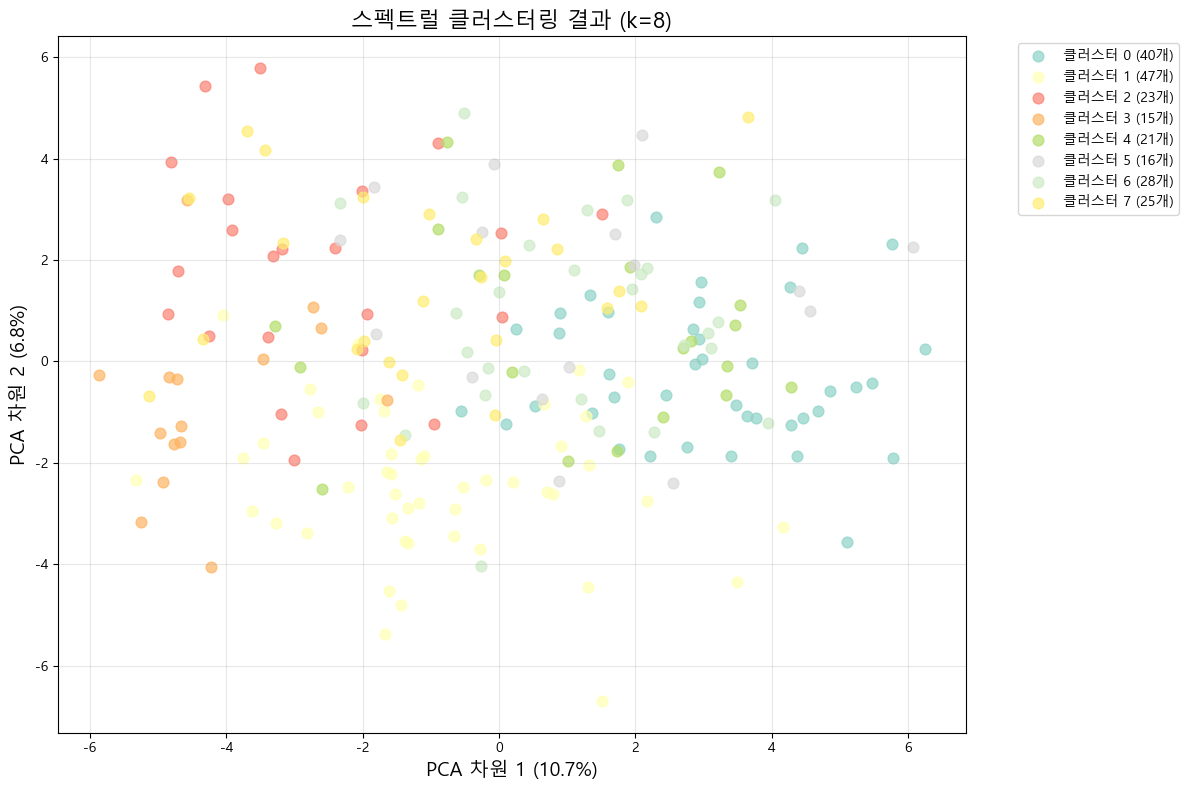


=== 클러스터별 샘플 리뷰 ===

--- 클러스터 0: 분위기/인테리어 ---
1. [FFEE] 아메라카노 원두 세가지 중에 고를 수 있어서 취향에 맞게 먹을 수 있어 좋아요. 물론 맛도 좋구요! 바닐라빈라떼랑 휘낭시에랑 에그타르트도 다 맛있어서 허겁지겁 먹었네요ㅋㅋ +담요,...
2. [걈카페,디저트] 조아요 커피 맛있어요! 케이크도! 진짜 아지트같은 카페에여ㅠㅠ최애 좌석이 편하고 콘센트 꼽기 좋다. 책상이 넓어 공부할 것 있을 때마다 들고 가게 됨. 친구랑 수다떨러 가기도 좋음...

--- 클러스터 1: 커피 품질 ---
1. [공차 건대로데오점] 일요일 마감 15분 전에 너무 먹고 싶어서 전화 드렸는데 마감까지 주문 받아주신다 하셔서 바로 달려갔더니 너무너무 친절하게 응대해주셨어요 !!
결제할 때 통신사 할인도 여쭤봐주셔...
2. [공차 어린이대공원역점] 만들어주시는 분 손이 짱 빨라요.
덕분에 시원하게 음료 먹을 수 있었습니다 ! 자주 방문하는 곳입니다.
이 날은 어린이대공원에 나들이 가기 전 공차 하나 들고 가라고 방문 했네...

--- 클러스터 2: 분석 중... ---
1. [고망고 건대점] 망고 디저트를 좋은 가격에 다양한 종류로 즐길 수 있어 좋고 먹고 갈수있는 이트인석도 있어 좋았어요! 매장도 깔끔해요! 음료가 엄청 빨리 나오네요~

지나다 궁금해서 들러봤는데...
2. [고망고 건대중문점] 프랜차이즈인줄도 모르고 부산여행 갔을 때 해운대 맛집이길래 가서 먹었던 기억이 ㅠㅠ 학교근처에 있었네요 ㅎㅎㅎ;; 더울때 상큼하게 먹기 좋고, 단 거 많이 먹으면 느끼해지는데 양이...

--- 클러스터 3: 디저트 맛집 ---
1. [나나케이크케이크전문] 남자친구와 4주년 기념으로 케이크 예약했는데 사장님도 정말 친절하시고 무엇보다 케이크가 예뻐서 먹기 아까울정도였어요! 특히 젤리가 투명하고 예쁜데 촛불켜니 반짝임과 영롱함이 두배 ...
2. [레스트인무드] 오늘도 도장깨기 성공
특히 케이크가 맛있어요! 다음엔 생과일 케이크 먹으러 가야딩 짱

In [4]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# 한글 폰트 설정 (Windows)
import matplotlib.font_manager as fm
import platform

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지
else:
    plt.rcParams['font.family'] = 'DejaVu Sans'

# 데이터 로드
df = pd.read_csv("Rdata.csv")
print(f"데이터 형태: {df.shape}")
print(f"카페 수: {df['카페이름'].nunique()}")
print(f"카페별 리뷰 수:\n{df['카페이름'].value_counts()}")

# 강화된 불용어 목록
stop_words = [
    # 기본 불용어
    '너무', '좋아요', '맛있어요', '정말', '진짜', '완전', '넘', '쩔어',
    'ㅎㅎ', 'ㅋㅋ', '다시', '또', '항상',
    
    # 형용사 변형
    '좋고', '맛있고', '예쁘고', '깨끗하고', '친절하고', '아늑하고',
    
    # 동사 변형
    '있어서', '가서', '와서', '해서', '갔어요', '왔어요', '가요', '와요',
    
    # 조사/어미
    '커피도', '분위기도', '사장님도', '직원도', '카페도', '매장도',
    '에요', '어요', '이고', '하고', '에서', '으로', '로서',
    
    # 일반적 표현
    '오늘', '어제', '내일', '지금', '그때', '이번', '다음',
    '여기', '거기', '저기', '이곳', '그곳', '저곳',
    '이거', '그거', '저거', '것도', '거나', '같아요', '같고',
    
    # 카페 리뷰 특화 불용어
    '리뷰', '방문', '추천', '번창', '사진', '올게요', '갈게요',
    '오늘도', '내일도', '어제도', '매번', '계속', '자주'
]

def remove_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# 불용어 제거
df['filtered_review'] = df['review'].apply(lambda x: remove_stop_words(str(x), stop_words))

# 임베딩 모델 로드
print("임베딩 모델 로딩 중...")
model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

# 임베딩 생성
print("임베딩 생성 중...")
texts = df['filtered_review'].astype(str).tolist()
embeddings = [model.encode(text, show_progress_bar=False) for text in tqdm(texts, desc="임베딩 생성")]

# 임베딩을 numpy 배열로 변환
embeddings = np.array(embeddings)
df['임베딩'] = [embedding.tolist() for embedding in embeddings]

# 코사인 유사도 행렬 계산
print("코사인 유사도 행렬 계산 중...")
similarity_matrix = cosine_similarity(embeddings)

# Spectral Clustering (k=8)
print("Spectral Clustering 수행 중...")
n_clusters = 8
spectral_clustering = SpectralClustering(
    n_clusters=n_clusters, 
    affinity='precomputed', 
    random_state=42,
    n_init=10
)
df['클러스터'] = spectral_clustering.fit_predict(similarity_matrix)

# 결과 저장
output_file = "Rdata_Spectral_k8.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"클러스터링 결과가 '{output_file}'에 저장되었습니다.")

# TF-IDF 벡터화 (강화된 불용어 처리)
print("TF-IDF 벡터화 중...")
vectorizer = TfidfVectorizer(
    max_features=1000, 
    stop_words=stop_words,
    max_df=0.8,  # 80% 이상 문서에 등장하는 단어 제거
    min_df=2,    # 2개 미만 문서에만 등장하는 단어 제거
    ngram_range=(1, 2)  # 1-gram과 2-gram 모두 사용
)
tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

# 클러스터별 통계
print(f"\n=== 클러스터링 결과 (k={n_clusters}) ===")
print(f"클러스터별 리뷰 개수:")
cluster_counts = df['클러스터'].value_counts().sort_index()
for cluster in sorted(df['클러스터'].unique()):
    count = len(df[df['클러스터'] == cluster])
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster}: {count}개 ({percentage:.1f}%)")

# 클러스터별 주요 키워드 추출
print(f"\n=== 클러스터별 주요 키워드 ===")
cluster_themes = {}

for cluster in sorted(df['클러스터'].unique()):
    cluster_indices = df[df['클러스터'] == cluster].index
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    top_indices = cluster_tfidf.A.flatten().argsort()[::-1][:10]
    top_keywords = [(feature_names[i], cluster_tfidf[0, i]) for i in top_indices]
    
    print(f"\n--- Cluster {cluster} ({len(cluster_indices)}개 리뷰) ---")
    keywords_list = []
    for keyword, score in top_keywords:
        print(f"  {keyword}: {score:.4f}")
        keywords_list.append(keyword)
    
    # 클러스터 특성 분석
    top_3_keywords = keywords_list[:3]
    cluster_themes[cluster] = top_3_keywords

# 클러스터별 특성 요약
print(f"\n=== 클러스터별 특성 요약 ===")
theme_names = {
    0: "분석 중...",
    1: "분석 중...",
    2: "분석 중...",
    3: "분석 중...",
    4: "분석 중...",
    5: "분석 중...",
    6: "분석 중...",
    7: "분석 중..."
}

for cluster, keywords in cluster_themes.items():
    # 키워드 기반 테마 추정
    if any(word in keywords for word in ['공부', '작업', '카공', '노트북']):
        theme_names[cluster] = "학습/작업 공간"
    elif any(word in keywords for word in ['디저트', '케이크', '휘낭시에', '달콤']):
        theme_names[cluster] = "디저트 맛집"
    elif any(word in keywords for word in ['분위기', '인테리어', '아늑', '예쁘']):
        theme_names[cluster] = "분위기/인테리어"
    elif any(word in keywords for word in ['커피', '원두', '아메리카노', '라떼']):
        theme_names[cluster] = "커피 품질"
    elif any(word in keywords for word in ['친절', '서비스', '직원', '사장님']):
        theme_names[cluster] = "서비스 품질"
    elif any(word in keywords for word in ['깨끗', '화장실', '청결', '매장']):
        theme_names[cluster] = "청결/시설"
    
    print(f"Cluster {cluster}: {theme_names[cluster]} - {', '.join(keywords[:3])}")

# PCA를 사용하여 차원 축소
print("PCA 차원 축소 중...")
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 스펙트럴 클러스터링 결과 시각화 (단일 플롯)
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))
unique_clusters = sorted(df['클러스터'].unique())

for i, cluster in enumerate(unique_clusters):
    cluster_points = reduced_embeddings[df['클러스터'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               label=f"클러스터 {cluster} ({len(cluster_points)}개)", 
               alpha=0.7, s=60, c=[colors[i]])

plt.title(f"스펙트럴 클러스터링 결과 (k={n_clusters})", fontsize=16)
plt.xlabel(f"PCA 차원 1 ({pca.explained_variance_ratio_[0]:.1%})", fontsize=14)
plt.ylabel(f"PCA 차원 2 ({pca.explained_variance_ratio_[1]:.1%})", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 각 클러스터의 샘플 리뷰 출력
print(f"\n=== 클러스터별 샘플 리뷰 ===")
for cluster in sorted(df['클러스터'].unique()):
    cluster_reviews = df[df['클러스터'] == cluster]['review'].head(2)
    cafe_names = df[df['클러스터'] == cluster]['카페이름'].head(2)
    
    print(f"\n--- 클러스터 {cluster}: {theme_names[cluster]} ---")
    for i, (cafe, review) in enumerate(zip(cafe_names.values, cluster_reviews.values), 1):
        print(f"{i}. [{cafe}] {review[:100]}...")

print(f"\n✅ 스펙트럴 클러스터링 완료!")
print(f"   - 클러스터 수: {n_clusters}개")
print(f"   - 총 리뷰 수: {len(df)}개")
print(f"   - PCA 설명 분산: {pca.explained_variance_ratio_.sum():.1%}")